In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
df = pd.read_csv('lightening_strikes_dataset.csv')

In [4]:
df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [37]:
df.shape

(3401012, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 77.8+ MB


In [9]:
df['month'] = df['date'].dt.month

In [10]:
df['month_txt'] = df['date'].dt.month_name().str.slice(stop=3)

In [11]:
df_by_month = df.groupby(['month', 'month_txt']).sum(numeric_only=True).sort_values('month', ascending= True).head(12).reset_index()
df_by_month

,month,month_txt,number_of_strikes
0,1,Jan,860045
1,2,Feb,2071315
2,3,Mar,854168
3,4,Apr,1524339
4,5,May,4166726
5,6,Jun,6445083
6,7,Jul,8320400
7,8,Aug,15525255
8,9,Sep,3018336
9,10,Oct,1093962


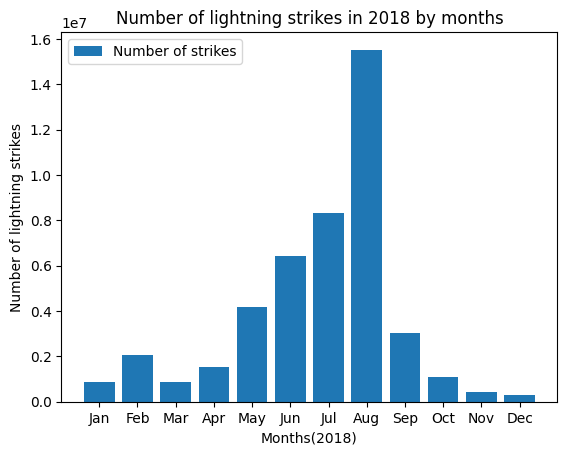

In [12]:
plt.bar(x=df_by_month['month_txt'], height=df_by_month['number_of_strikes'], label="Number of strikes")

plt.xlabel("Months(2018)")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes in 2018 by months")

plt.legend()
plt.show()

In [13]:
import seaborn as sns

In [17]:
df['week'] = df['date'].dt.strftime('%Y-W%V')
df['month'] = df['date'].dt.strftime('%Y-%m')
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['date'].dt.strftime('%Y')
df.head()

,date,number_of_strikes,center_point_geom,month,month_txt,week,quarter,year
0,2018-01-03,194,POINT(-75 27),2018-01,Jan,2018-W01,2018-Q1,2018
1,2018-01-03,41,POINT(-78.4 29),2018-01,Jan,2018-W01,2018-Q1,2018
2,2018-01-03,33,POINT(-73.9 27),2018-01,Jan,2018-W01,2018-Q1,2018
3,2018-01-03,38,POINT(-73.8 27),2018-01,Jan,2018-W01,2018-Q1,2018
4,2018-01-03,92,POINT(-79 28),2018-01,Jan,2018-W01,2018-Q1,2018


In [20]:
df_by_week_2018 = df[df['year'] == '2018'].groupby(['week']).sum(numeric_only=True).reset_index()
df_by_week_2018.head()

,week,number_of_strikes
0,2018-W01,34843
1,2018-W02,353425
2,2018-W03,37132
3,2018-W04,412772
4,2018-W05,34972


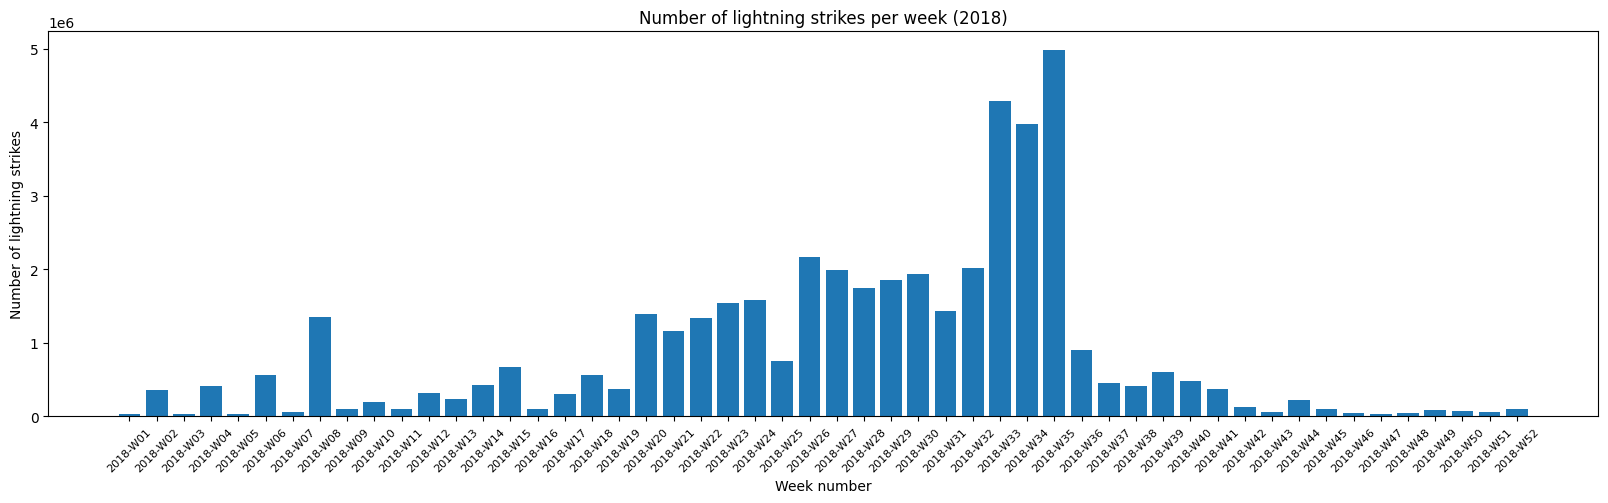

In [25]:
plt.figure(figsize= (20, 5))
plt.bar(x = df_by_week_2018['week'], height= df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week (2018)")
plt.xticks(rotation = 45, fontsize= 8)

plt.show()

In [34]:
df_by_quarter = df.groupby(['quarter']).sum(numeric_only= True).reset_index()


df_by_quarter['number_of_strikes_formatted'] = df_by_quarter['number_of_strikes'].div(1000000).round(1).astype(str)+'M'

In [30]:
def addLabels(x, y, labels):
    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha= 'center', va= 'bottom')

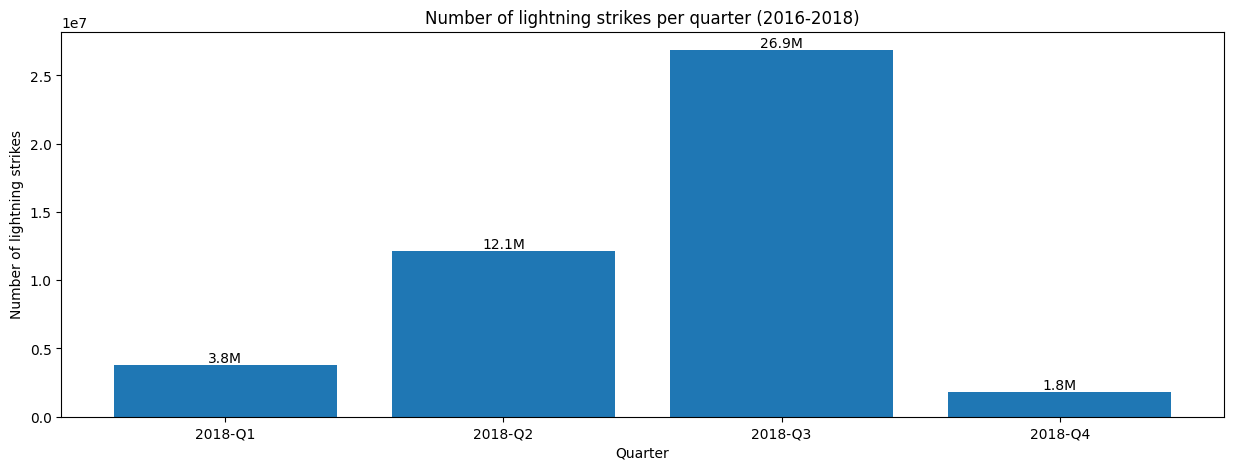

In [ ]:
plt.figure(figsize = (15, 5))
plt.bar(x = df_by_quarter['quarter'], height = df_by_quarter['number_of_strikes'])
addLabels(df_by_quarter['quarter'], df_by_quarter['number_of_strikes'], df_by_quarter['number_of_strikes_formatted'])
plt.plot()
plt.xlabel('Quarter')
plt.ylabel('Number of lightning strikes')
plt.title('Number of lightning strikes per quarter (2018)')
plt.show()